# 1) Convolutional neural network 를 사용한 MNIST 숫자 이미지(손글씨 숫자 이미지) 분류

In [ ]:
import keras

In [ ]:
from keras import layers, models

#Conv net의 입력 tensor = (image_height, image_width, image_channels)

mymodel = models.Sequential()
mymodel.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # 32개의 3X3 필터
mymodel.add(layers.MaxPooling2D((2,2)))
mymodel.add(layers.Conv2D(64,(3,3),activation='relu'))
mymodel.add(layers.MaxPooling2D((2,2)))
mymodel.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
mymodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


마지막 단계의 출력 텐서를 1D 텐서로 펼친 후, 완전 연결 네트워크에 주입

In [ ]:
mymodel.add(layers.Flatten())  # 3D->1D
mymodel.add(layers.Dense(64, activation='relu'))
mymodel.add(layers.Dense(10, activation='softmax')) # 10개의 클래스를 분류하기 위해 마지막 층의 출력 크기 10

mymodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

위 Conv net을 MNIST 숫자 이미지에 훈련한다.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(trainimages, trainlabels),(testimages, testlabels) = mnist.load_data()

trainimages = trainimages.reshape((60000,28,28,1))
trainimages = trainimages.astype('float32')/255  # 0~1 사이의 값으로 변경

testimages = testimages.reshape((10000,28,28,1))
testimages = testimages.astype('float32')/255

trainlabels = to_categorical(trainlabels)
testlabels = to_categorical(testlabels)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
mymodel.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
mymodel.fit(trainimages, trainlabels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 43s 45ms/step - loss: 0.3936 - accuracy: 0.8754
Epoch 2/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0504 - accuracy: 0.9837
Epoch 3/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0325 - accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0253 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0219 - accuracy: 0.9934


test data에서 모델 평가

In [ ]:
testloss, testacc = mymodel.evaluate(testimages, testlabels)
print ('test acc = ', testacc)

# Fully Connected Network 보다 성능이 향상됨.

313/313 [==============================] - 3s 8ms/step - loss: 0.0295 - accuracy: 0.9906
test acc =  0.9905999898910522


# 2) kaggle의 소규모 데이터에서 CNN 사용

In [1]:
import os, shutil,zipfile

In [8]:
# 25,000개의 원본 kaggle 데이터 중 2,000개만 로드해서 사용.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-01-13 06:37:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 74.125.203.128, 2404:6800:4008:c02::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  26.0MB/s    in 2.5s    

2021-01-13 06:37:04 (26.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [20]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [21]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.333.jpg', 'cat.305.jpg', 'cat.171.jpg', 'cat.997.jpg', 'cat.691.jpg', 'cat.426.jpg', 'cat.178.jpg', 'cat.46.jpg', 'cat.783.jpg', 'cat.861.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [22]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


## 2-1) 네트워크 구성

In [23]:
from keras import layers,models
#Conv net의 입력 tensor = (image_height, image_width, image_channels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',  # 32개의 3x3 필터
                        input_shape=(150, 150, 3))) # 임의로 선택한 150X150 크기의 입력
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())  # 3D->1D
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # 두개의 클래스 중 한 클래스에 대한 확률을 인코딩

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [25]:
from keras import optimizers

model.compile(loss='binary_crossentropy',  # model의 마지막이 sigmoid unit이기 때문
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 2-2) 데이터 전처리 (JPEG -> 부동소수 타입의 텐서)

In [26]:
# 이미지 파일을 전처리된 배치 텐서로 자동 전환해주는 ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), # train_dir의 모든 이미지를 150x150 크기로 변환
        batch_size=20,
        class_mode='binary')  # loss=binary_crossentropy 이기때문

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),  # validaion_dir의 모든 이미지를 150x150 크기로
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기 : ',data_batch.shape)
  print('이진 배치 레이블 크기 : ',labels_batch.shape)
  break

배치 데이터 크기 :  (20, 150, 150, 3)
배치 레이블 크기 :  (20,)


각 배치에 20개의 샘플이 있고, 150x150xRGB의 이미지 데이터가 있음을 알 수 있다.

In [28]:
# fit_generator 메서드를 활용해, 제너레이터를 사용한 데이터에 위의 모델을 훈련

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # generator로부터 얼마나 많은 샘플을 뽑을 것인지(배치의 개수) 설정
    epochs=30,
    validation_data=validation_generator,  # 검증 데이터의 배치를 끝없이 반환
    validation_steps=50  # 검증 generator에서 얼마나 많은 배치를 추출하여 평가할지 설정
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 106s 1s/step - loss: 0.6976 - acc: 0.4932 - val_loss: 0.6703 - val_acc: 0.5510
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.6660 - acc: 0.6055 - val_loss: 0.6656 - val_acc: 0.5510
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.6246 - acc: 0.6569 - val_loss: 0.6007 - val_acc: 0.6900
Epoch 4/30
100/100 [==============================] - 104s 1s/step - loss: 0.5872 - acc: 0.6743 - val_loss: 0.5954 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5374 - acc: 0.7342 - val_loss: 0.5833 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5022 - acc: 0.7460 - val_loss: 0.5674 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4801 - acc: 0.7723 - val_loss: 0.5519 - val_acc: 0.7250
Epoch 8/30
100/100 [==============================] - 106s 1s/step - 

훈련이 끝났다면 꼭 모델을 저장

In [29]:
model.save('cats_and_dogs_small_1.h5')

## 2-3) train, valid data에 대한 모델의 loss,accuracy 그래프

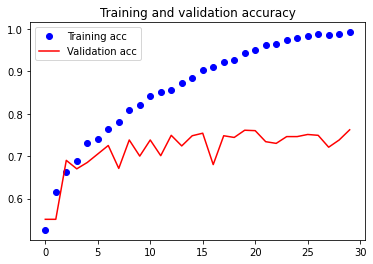

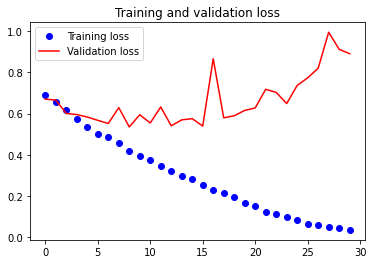

In [30]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()  # 한 화면에 여러개의 그래프를 그릴 때 사용

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

train acc는 epoch가 진행됨에 따라 거의 100%에 가깝지만, valid acc은 약 70%에서 멈추는 과대적합의 특성을 보인다.  

2,000개밖에 안되는 적은 train 샘플의 수가 그 원인이 될 수 있다. 과대적합을 감소시킬 수 있는 방법에는 드롭아웃, 가중치 감소(L1,L2 규제) 등이 있다.   
이번에는 데이터 증식을 시도해보자.

## 2-4) 데이터 증식

새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 있으려면, 무한히 많은 데이터를 통해 데이터 분포의 모든 가능한 측변을 모델이 학습할 수 있어야 한다. 따라서 기존의 train sample에 여러가지 랜덤한 변환을 적용해 그럴듯한 이미지를 여러 개 생성해 샘플의 갯수를 늘린다. 이는 모델이 일반화하는것에 도움이 될 것이다. 

In [31]:
# 이미지에 랜덤 변환을 적용하는 ImageDataGenerator 사용

datagen = ImageDataGenerator(
      rotation_range=40,  # 회전 각도 조정
      width_shift_range=0.2,  # 수평으로 평행 이동
      height_shift_range=0.2,  # 수직으로 평행 이동
      shear_range=0.2,
      zoom_range=0.2,  # 랜덤하게 확대할 범위
      horizontal_flip=True,  # 랜덤하게 수평으로 뒤집음
      fill_mode='nearest')  # 이동으로 인해 생성된 빈 픽셀을 채우는 방법 설정

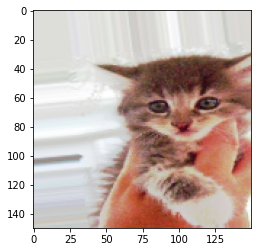

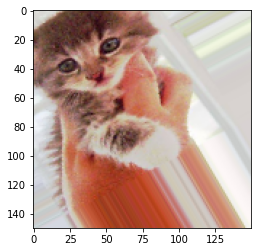

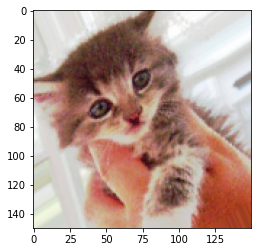

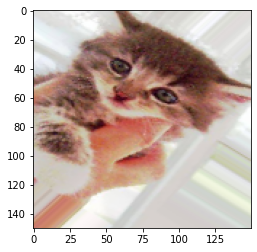

In [32]:
# 증식된 이미지 샘플 확인
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]  # 증식할 이미지 선택
img = image.load_img(img_path, target_size=(150, 150))  # 이미지를 읽고 크기를 변경

x = image.img_to_array(img)  # (150, 150, 3) 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape)  # (1, 150, 150, 3) 크기로 변환

# flow() 메서드는 랜덤하게 변환된 이미지의 batch를 생성
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break  # 무한 반복되기 때문에 중지 필요

plt.show()

증식된 데이터는 train데이터와 완전히 동일하지는 않지만 높은 연관성이 있기 때문에 과대적합을 제거하기에 완벽한 방법은 아니다. 또 다른 방법으로는 완전연결 분류기 직전에 Dropout 층을 추가하는 방법이 있다.

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [44]:
# 데이터 증식과 Dropout을 사용해 네트워크 훈련

# 이미지 파일을 전처리된 배치 텐서로 자동 전환
train_datagen = ImageDataGenerator(  
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# test 데이터는 증식되면 안된다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), # train_dir의 모든 이미지를 150x150 크기로 변환
        batch_size=32,
        class_mode='binary')  # loss=binary_crossentropy 이기때문

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),   # validaion_dir의 모든 이미지를 150x150 크기로 변환
        batch_size=32,
        class_mode='binary')

# fit_generator 메서드를 활용해, 제너레이터를 사용한 데이터에 위의 모델을 훈련
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 112s 1s/step - loss: 0.5451 - acc: 0.7130 - val_loss: 0.5275 - val_acc: 0.7370


In [45]:
# 훈련이 끝난 모델은 저장
model.save('cats_and_dogs_small_2.h5')

## 2-5) 증식과 Dropout을 적용한 모델의 loss,accuracy 그래프

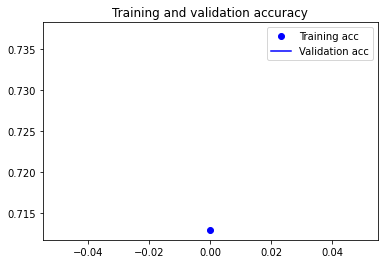

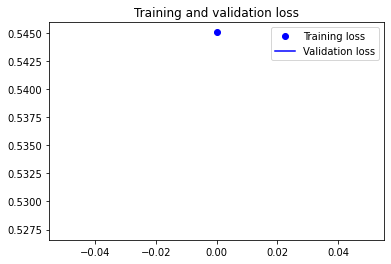

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

데이터 이상으로 위의 결과를 확인하지 못했지만, 학습자료 실습 코드 실행 결과를 통해, val_acc가 약 80% 이상으로 증가했고, val_loss는 약45% 미만으로 감소한 것을 알 수 있다.  
따라서 데이터 증식과 Dropout을 활용하면 더이상 과적합을 어느정도 완화할 수 있다.